# Collect Data


In [3]:
import pandas as pd
import re

In [4]:
#df = pd.read_csv('/content/drive/Shareddrives/real/Big Data/data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')

# for jupyter 
df = pd.read_csv('data/big-data/vfnd-vietnamese-fake-news-datasets-master/CSV/vn_news_223_tdlfr.csv')


In [5]:
df.head()

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1


In [6]:
# clean domain names, since there are things like http://zing.news.vn/ and zing.news.vn which are the same thing
for i in range(len(df['domain'])):
  df.at[i, 'domain'] = re.sub(r'www.|/|https:|http:', '', df['domain'][i])

In [7]:
# check for missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    223 non-null    object
 1   domain  223 non-null    object
 2   label   223 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 5.4+ KB
None


# Visualization

In [8]:
#!pip install plotly
#!pip install cufflinks

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# run this again if iplot doesn't display

import numpy as np
import pandas as pd

# plotly packages
import plotly
#import iplot
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

Tổng số lượng nhãn: 223 

label
0    123
1    100
dtype: int64 



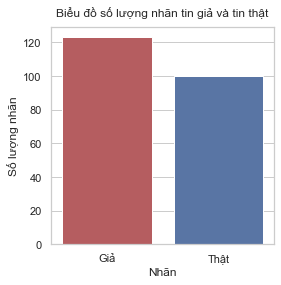

In [11]:
# Count of each label
label_count = df.value_counts('label')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.barplot(x=['Giả', 'Thật'], y=label_count, palette=['r', 'b'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng nhãn')
plt.title('Biểu đồ số lượng nhãn tin giả và tin thật', y=1.02) # y = space from graph
print('Tổng số lượng nhãn:', len(df['label']), '\n')
print(label_count, '\n')

Tổng số lượng các tên miền: 29 

domain
vnexpress.net              73
tinvn.info                 68
dantri.com.vn              14
thethao.tuoitre.vn         10
news.zing.vn                7
thoibao.today               6
tuoitre.vn                  5
tintucqpvn.net              5
thanhnien.vn                5
kinhdoanh.vnexpress.net     3
phapluat.news               3
doisong.vnexpress.net       2
thegioitre.vn               2
giadinhtiepthi.com          2
giaitri.vnexpress.net       2
ipick.vn                    2
thoibao.de                  2
vietgiaitri.com             1
baonuocmy.com               1
binhluan.biz                1
sorry.vn                    1
suckhoe.vnexpress.net       1
dulich.vnexpress.net        1
sohoa.vnexpress.net         1
baoangiang.com.vn           1
laodong.vn                  1
haiduong.tintuc.vn          1
gioitreviet.net             1
autoxe.net                  1
dtype: int64 



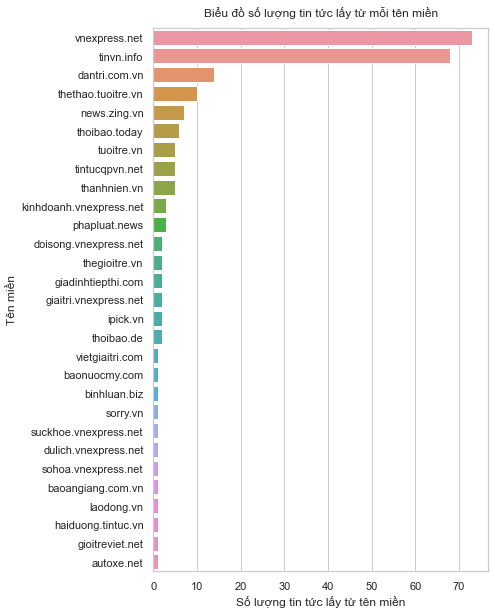

In [12]:
# Count of each domain names
domain_count = df.value_counts('domain')

plt.figure(figsize=(6, 10))
sns.barplot(x=domain_count, y=domain_count.index)
plt.xlabel('Số lượng tin tức lấy từ tên miền')
plt.ylabel('Tên miền')
plt.title('Biểu đồ số lượng tin tức lấy từ mỗi tên miền', y=1.01) # y = space from graph
print('Tổng số lượng các tên miền:', len(set(df['domain'])), '\n')
print(domain_count, '\n')

domain_count.iplot(
    kind='barh',
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng tin tức lấy từ mỗi tên miền',
    color='red')

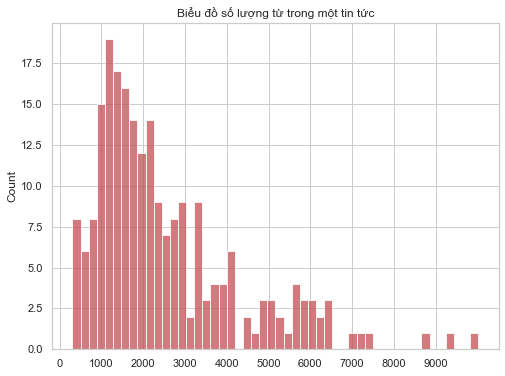

In [13]:
# interactive plot and colored plot

len_text = [len(t) for t in df['text']]
df['len_text'] = len_text

plt.figure(figsize=(8, 6))
sns.histplot(data=len_text, bins=50, color='r')
plt.xticks(ticks=range(0,10000,1000))
plt.title('Biểu đồ số lượng từ trong một tin tức')

df['len_text'].iplot(
    kind='hist',
    bins=50,
    xTitle='Số từ',
    yTitle='Số tin tức',
    linecolor='black',
    title='Biểu đồ số lượng từ trong một tin tức',
    )

In [14]:
# idea: top các bài báo có số lượng từ nhiều nhất thuộc về các domain nào
# word cloud

In [15]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
sns.barplot(x=domain_count, y=domain_count.index)

NameError: name 'sns' is not defined

# Pre-processing

In [ ]:
'''
1. clean domain names (done)
2. classify domain names to categorical type? labelencoder or sth else
3. xử lý text
    check missing or too trash
    clean, filer (regex) on some part if needed
    tokenize, word segment, remove stopwords?, group same tokens? -> check again if too short text data remains-> remove from data?
    word embedding: word2vec...?
'''

In [ ]:
!pip install pyvi

In [ ]:
# pyvi, fast and ez, but bad word segmentations
from pyvi import ViTokenizer
ViTokenizer.tokenize('Nguyễn Hoàng Minh đang sử dụng mạng xã hội')

'Nguyễn Hoàng_Minh đang sử_dụng mạng xã_hội'

In [ ]:
!pip install vncorenlp

In [ ]:
# vncorenlp, have to connect to some sort of server with a downloaded file -> ERROR, but better than python-vncorenlp as it has seperate tokenizer and stuffs 
from vncorenlp import VnCoreNLP
annotator = VnCoreNLP('/content/drive/Shareddrives/real/Big Data/data/vncorenlp/vncorenlp-1.0.3.tar.gz', annotators='wseg,pos,ner,parse', max_heap_size='-Xmx2g') 

In [ ]:
!pip install python-vncorenlp

In [ ]:
# vncorenlp still but sth like a python wrapper, easier to access. Doesn't have a seperate tokenizer, only annotate -> annoying preprocess, redundant and might be slow
from python_vncorenlp import install, Pipeline
install('-Xmx2g')

In [ ]:
pipeline = Pipeline()
pipeline.load_model()

In [ ]:
# work perfectly but still 
print(pipeline.annotate_doc('Nguyễn Hoàng Minh Thư đang sử dụng mạng xã hội'))
print(pipeline.annotate_doc('Mạc Thuận Đạt đang sử dụng mạng xã hội'))

[[Token(text='Nguyễn_Hoàng_Minh_Thư', pos=None, ner=None, dep=None), Token(text='đang', pos=None, ner=None, dep=None), Token(text='sử_dụng', pos=None, ner=None, dep=None), Token(text='mạng', pos=None, ner=None, dep=None), Token(text='xã_hội', pos=None, ner=None, dep=None)]]
[[Token(text='Mạc_Thuận_Đạt', pos=None, ner=None, dep=None), Token(text='đang', pos=None, ner=None, dep=None), Token(text='sử_dụng', pos=None, ner=None, dep=None), Token(text='mạng', pos=None, ner=None, dep=None), Token(text='xã_hội', pos=None, ner=None, dep=None)]]


In [ ]:
!pip install underthesea

In [ ]:
from underthesea import word_tokenize
print(word_tokenize('Nguyễn Hoàng Minh Thư đang sử dụng mạng xã hội', format='text'))
print(word_tokenize('Mạc Thuận Đạt đang sử dụng mạng xã hội', format='text')) # -> doesn't work with some names?

Nguyễn_Hoàng_Minh_Thư đang sử_dụng mạng xã_hội
Mạc Thuận_Đạt đang sử_dụng mạng xã_hội


# Model

# Evaluation